<a href="https://colab.research.google.com/github/Tarde98/DataScienceI/blob/main/dataSetTardella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data set de Autos Electricos descargados de Kaggle**


En este dataSet se guardan datos de la población de autos electricos en Estados Unidos. Vamos a analizarlo para poder sacar información interesante del mismo.

Primero guardamos la url del dataSet que guardamos en el repositorio de GitHub

In [16]:
url = 'https://raw.githubusercontent.com/Tarde98/DataSciendeI/refs/heads/main/dataSet.csv'

Importamos las librerias de Numpy, Pandas y MatPlotLib



In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mostramos el .csv como data frame

In [18]:
df = pd.read_csv(url)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP5G,King,Seattle,WA,98125.0,2016.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,349455557.0,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016.0,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315.0,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98115.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,171417494.0,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312.0,2024.0,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,262542927.0,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EB1J,Thurston,Olympia,WA,98512.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,110432815.0,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10


Tamaño del data frame, en donde, filas x columnas

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         2953 non-null   object 
 1   County                                             2950 non-null   object 
 2   City                                               2950 non-null   object 
 3   State                                              2951 non-null   object 
 4   Postal Code                                        2950 non-null   float64
 5   Model Year                                         2951 non-null   float64
 6   Make                                               2951 non-null   object 
 7   Model                                              2951 non-null   object 
 8   Electric Vehicle Type                              2951 non-null   object 
 9   Clean Al

Uso la función .describe para ver rápidamente una vista previa de los valores numéricos que se hayan en el df

In [20]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,2950.000000,2951.000000,2951.000000,2951.000000,2950.000000,2.951000e+03,2.950000e+03
mean,98204.985085,2021.192477,55.329041,784.817011,32.811864,2.347796e+08,5.303526e+10
std,251.504544,3.243595,89.509862,7378.015505,14.629348,7.144164e+07,1.425727e+07
min,98001.000000,2000.000000,0.000000,0.000000,1.000000,1.519234e+06,5.300796e+10
25%,98033.000000,2019.000000,0.000000,0.000000,21.000000,2.021460e+08,5.303301e+10
50%,98109.000000,2022.000000,0.000000,0.000000,37.000000,2.535633e+08,5.303302e+10
75%,98277.000000,2024.000000,73.000000,0.000000,45.000000,2.722950e+08,5.303303e+10
max,99362.000000,2026.000000,337.000000,184400.000000,49.000000,4.788389e+08,5.307794e+10


Con esto podemos ver que la media de autos electricos es de 2021, que el más antiguo es el del 2000 y que el más nuevo es de 2026. Otro dato interesante es que el rango electrico mediano es de 55 kms.

Me fijo que tipo de datos es el rango electrico

In [21]:
print(df['Electric Range'].dtype)

float64


Es un float por lo tanto puedo comprar para traer los autos que tengan menos de 30kms de autonomía electrica

In [22]:
autonomia30 = df.loc[(df['Electric Range']<30) & ((df['Electric Range']!= 0))] #Filtro por las filas que cumplan la condicion de Rango Electrico < 10
#tambien quito los que estan en 0 ya que puede ser por un problema de recopilación de datos del dataset

print('Cantidad de autos con menor autonimia a 30 kms: ',autonomia30.shape[0])

autonomia30.head() #Listo los registros que quedaron

Cantidad de autos con menor autonimia a 30 kms:  312


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312.0,2024.0,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,262542927.0,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
21,WP1AE2A25G,Kitsap,Seabeck,WA,98380.0,2016.0,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,35.0,187199456.0,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
29,WBA8E1C3XH,Snohomish,Everett,WA,98208.0,2017.0,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,44100.0,44.0,247400478.0,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
33,3FA6P0SU8G,Yakima,Yakima,WA,98903.0,2016.0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,15.0,318463302.0,POINT (-120.4778 46.55351),PACIFICORP,5.307700e+10
40,JM3KKDHA7R,Kitsap,Poulsbo,WA,98370.0,2024.0,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,23.0,270047242.0,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10


Reviso los detalles del auto año 2000 que vimos en el resumen con el .describe que ya estaban en circulación para ver cual es

In [23]:
auto_mas_antiguo = df.loc[(df['Model Year']==2000)]
auto_mas_antiguo.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
43,1FTZR0816Y,King,Shoreline,WA,98133.0,2000.0,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58.0,0.0,32.0,205243356.0,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10


Podemos ver cuantos autos por marca hay en el dataset. Gracias a eso podemos ver que Tesla es el más y menos vendido.

In [24]:
auto_por_marca = df.groupby('Make')['VIN (1-10)'].count() #usamos groupby para agrupar por marca contando un valor unico como el VIN (Vehicle Identification Number)
marcas_mas_vendidos = auto_por_marca.sort_values( ascending=False).head(10) #Guardo los primeros 10 más vendidos
marcas_menos_vendidos = auto_por_marca.sort_values( ascending=False).tail(10) #Guardo los 10 nemos vendidos

pd.concat([marcas_mas_vendidos, marcas_menos_vendidos]) #Los concateno para mostrar en un solo dataFrame que sirva de vistazo para la estadistica

,VIN (1-10)
Make,
TESLA,1222
NISSAN,257
CHEVROLET,201
BMW,168
KIA,150
TOYOTA,144
FORD,137
HYUNDAI,83
VOLVO,82


Ya que vemos que TESLA es la marca más vendida, veamos que modelos son los que se vendieron

In [25]:
autos_tesla = df.loc[(df['Make']=='TESLA')] #Apartamos las filas en donde la marca sea TESLA
cantidad_modelo_tesla = autos_tesla.groupby('Model')['VIN (1-10)'].count() #usamos groupby para agrupar por modelo contando un valor unico como el VIN (Vehicle Identification Number)
cantidad_modelo_tesla.sort_values( ascending=False) #Listamos ordenando de mayor a menor los modelos vendidos por la marca tesla


,VIN (1-10)
Model,
MODEL Y,573
MODEL 3,450
MODEL S,99
MODEL X,85
CYBERTRUCK,15


Miremos ahora el promedio del año del modelo por marca y los ordenamos para saber cuales son las marcas que más se compran en los últimos años

In [26]:
anio_por_marca = df.groupby('Make')['Model Year'].mean().astype(int) #Calculo la media y lo guardo como entero ya que son años
anio_por_marca.sort_values( ascending=False).head(10)

,Model Year
Make,
ACURA,2024
ALFA ROMEO,2024
DODGE,2024
CADILLAC,2024
MAZDA,2024
GMC,2024
LAND ROVER,2024
SUBARU,2023
LEXUS,2023


Ahora vamos a trabajar con series de tiempo. Veamos como fue variando la población de autos electricos a traves del tiempo. Para esto deberíamos saber en que rango de años de manejan nuestros datos. Lo averiguamos rapidamente de la siguiente manera:

In [27]:
df['Model Year'].unique()

array([2016., 2018., 2024., 2015., 2019., 2020., 2012., 2013., 2022.,
       2023., 2017., 2014., 2021., 2000., 2025., 2011.,   nan, 2026.])

Con esta información ya podemos comenzar a trabajar

In [28]:
serie_anual = pd.date_range(start='2016', end='2026', freq = 'YE') #Creamos una serie de tiempo por años

df['Fecha'] = pd.to_datetime(df['Model Year'], format='%Y') #Con esto nos aseguramos de que todas las filas de la columna estén en formato AÑO para la fecha

cant_por_anio = df.set_index('Fecha').resample('YE').size() #Contamos la cantidad de autos por año

cant_por_anio


,0
Fecha,
2000-12-31,1
2001-12-31,0
2002-12-31,0
2003-12-31,0
2004-12-31,0
2005-12-31,0
2006-12-31,0
2007-12-31,0
2008-12-31,0


Sabiendo las cantidades ahora lo podemos volcar a la serie de tiempo

In [29]:
cant_por_anio = cant_por_anio.reindex(serie_anual, fill_value=0)
cant_por_anio


,0
2016-12-31,95
2017-12-31,111
2018-12-31,225
2019-12-31,150
2020-12-31,191
2021-12-31,226
2022-12-31,307
2023-12-31,648
2024-12-31,515
2025-12-31,254


Lo vemos visualmente utilizando MatPlotLib

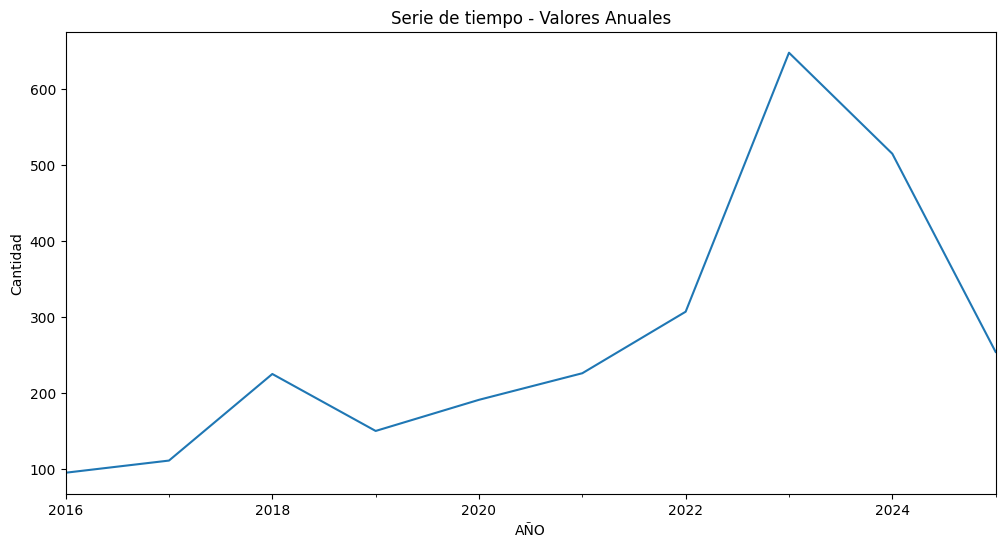

In [30]:
cant_por_anio.plot(title='Serie de tiempo - Valores Anuales',figsize =(12,6))
plt.xlabel('AÑO')
plt.ylabel('Cantidad')
plt.show()

De esta manera gracias al gráfico podemos darnos cuenta que los modelos más vendidos de autos eléctricos son del 2023